In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("Datasets/height-weight.csv")

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [8]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


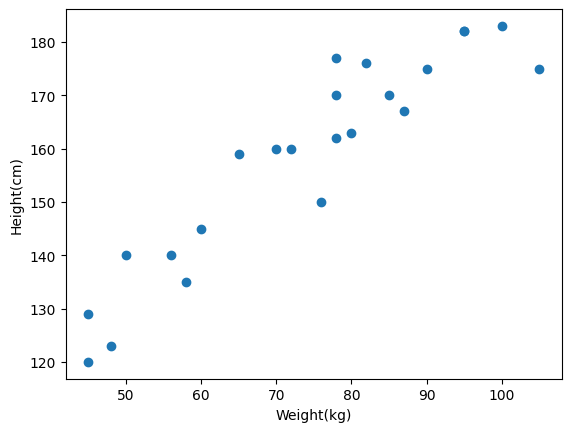

In [11]:
plt.scatter(df.Weight, df.Height)
plt.xlabel("Weight(kg)")
plt.ylabel("Height(cm)")
plt.show()

In [12]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


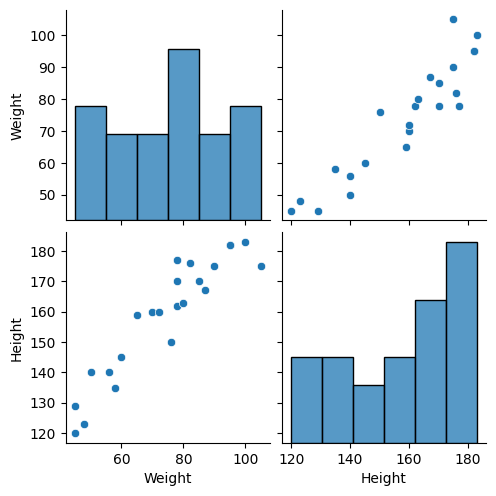

In [13]:
import seaborn as sns
sns.pairplot(df)

In [19]:
#splitting independent and dependent features
X = df[['Weight']] #independent features should always be 2D, so use df[['Weight]] instead of df['Weight']
print(X.shape)
y = df['Height'] #dependent variable can be a pandas series
print(y.shape)

(23, 1)
(23,)


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
#standardization
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [33]:
#standardizing test data
#do not fit scaler to test data to prevent data leakage from test data to train data
X_test = scaler.transform(X_test)

In [34]:
#apply linear regression
from sklearn.linear_model import LinearRegression

In [35]:
regression = LinearRegression(n_jobs=-1) #n_jobs sets number of processors(cores?) to use; -1=use all cores

In [36]:
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [37]:
print("Coefficient/Slope of best fit line:", regression.coef_)
print("y intercept of best fit line:", regression.intercept_)

Coefficient/Slope of best fit line: [17.2982057]
y intercept of best fit line: 156.47058823529412




> Slope of 17 indicates that for every unit increase in weight, height increases by 17 cms



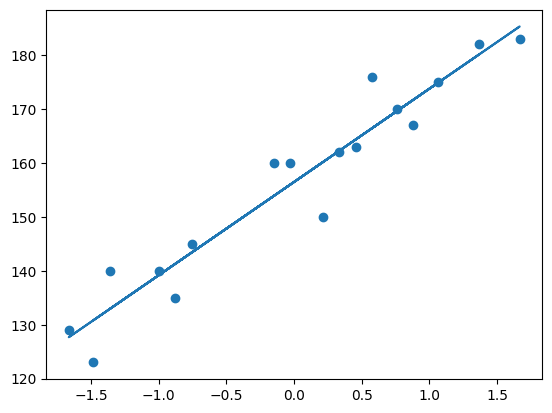

In [39]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

In [41]:
#predicting for test data
y_pred = regression.predict(X_test)
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [44]:
#performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_pred) #r2 score
adjusted_r2 = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2_Score: {score}, Adjusted R2: {adjusted_r2}')

MAE: 9.66512588679501, MSE: 114.84069295228699, RMSE: 10.716374991212605, R2_Score: 0.7360826717981276, Adjusted R2: 0.6701033397476595


# OLS Linear Regression

In [45]:
import statsmodels.api as sm


In [47]:
model = sm.OLS(y_train, X_train).fit()

In [48]:
prediction = model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [49]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sat, 13 Jul 2024   Prob (F-statistic):                       0.664
Time:                        07:16:19   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# Prediction for new data

In [52]:
regression.predict(scaler.transform([[78]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([162.26499721])